# Back and Forward Propagation on Planar Data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from testCases_v2 import *

## Generating Planar Data and visualizing 

In [2]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

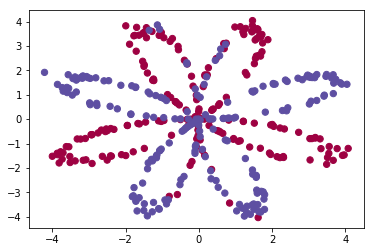

In [3]:
X, Y = load_planar_dataset()
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral)
plt.show()

# writing definition for activation function 

In [4]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

## Forward Propagation

In [5]:
#number of input units
n_x = X.shape[0]
n_h = 4
n_y = Y.shape[0]
m = len(X[0,:])

In [6]:
def initialize_params():
    W1 = np.random.randn(n_h, n_x) * 0.01
    W2 = np.random.randn(n_y, n_h) * 0.01
    b1 = np.zeros((n_h,1))
    b2 = np.zeros((n_y,1))
    return {"W1":W1,"W2":W2, "b1":b1, "b2": b2}

In [7]:
def forward_propagation(X,params):
    
    W1 = params["W1"]
    W2 = params["W2"]
    b1 = params["b1"]
    b2 = params["b2"]
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [20]:
def back_propagation(X,Y):
    parameters = initialize_params()
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    A2,A1,Z1 = forward_propagation(X,Y)
    dZ2 = A2-Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)* np.sum(dZ2, keepdims=True, axis=1)
    dZ1 = np.multiply(np.dot(W2.T,dZ2),np.power((1-np.tanh(A1)),2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1, keepdims=True, axis=1)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

In [ ]:
def compute_cost(A2):
    A2,A1,Z1 = forward_propagation(X,Y)
    
    J = -(1/m)* np.sum((np.dot(Y,np.log(A2).T)) + (np.dot((1-Y),np.log(1-A2).T)))
    return J